# Garch Model

## Importing

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

 ## Nifty 50 Volitality Prediction

In [2]:
df = pd.read_csv("NIFTY 50_Historical_PR_12112004to12112024.csv")

In [3]:
df.head

<bound method NDFrame.head of      Index Name         Date      Open      High       Low     Close
0      NIFTY 50  11 Nov 2024  24087.25  24336.80  24004.60  24141.30
1      NIFTY 50  08 Nov 2024  24207.70  24276.15  24066.65  24148.20
2      NIFTY 50  07 Nov 2024  24489.60  24503.35  24179.05  24199.35
3      NIFTY 50  06 Nov 2024  24308.75  24537.60  24204.05  24484.05
4      NIFTY 50  05 Nov 2024  23916.50  24229.05  23842.75  24213.30
...         ...          ...       ...       ...       ...       ...
4956   NIFTY 50  19 Nov 2004   1891.95   1898.15   1869.35   1872.35
4957   NIFTY 50  18 Nov 2004   1890.45   1895.30   1880.80   1892.05
4958   NIFTY 50  17 Nov 2004   1879.05   1892.15   1874.35   1888.65
4959   NIFTY 50  16 Nov 2004   1872.80   1881.40   1862.80   1879.00
4960   NIFTY 50  12 Nov 2004   1871.90   1885.05   1866.75   1872.95

[4961 rows x 6 columns]>

In [4]:
df.columns


Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [5]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,2024-11-11,24087.25,24336.80,24004.60,24141.30
1,NIFTY 50,2024-11-08,24207.70,24276.15,24066.65,24148.20
2,NIFTY 50,2024-11-07,24489.60,24503.35,24179.05,24199.35
3,NIFTY 50,2024-11-06,24308.75,24537.60,24204.05,24484.05
4,NIFTY 50,2024-11-05,23916.50,24229.05,23842.75,24213.30
...,...,...,...,...,...,...
4956,NIFTY 50,2004-11-19,1891.95,1898.15,1869.35,1872.35
4957,NIFTY 50,2004-11-18,1890.45,1895.30,1880.80,1892.05
4958,NIFTY 50,2004-11-17,1879.05,1892.15,1874.35,1888.65
4959,NIFTY 50,2004-11-16,1872.80,1881.40,1862.80,1879.00


In [6]:
df = df.sort_values('Date')

In [7]:
df.set_index('Date', inplace=True)

In [8]:
returns = 100 * df['Close'].pct_change().dropna()
print(returns.head())

Date
2004-11-16    0.323020
2004-11-17    0.513571
2004-11-18    0.180023
2004-11-19   -1.041199
2004-11-22    0.053409
Name: Close, dtype: float64


In [9]:
returns.index[-1]

Timestamp('2024-11-11 00:00:00')

Text(0.5, 1.0, 'Nifty 50 retuns')

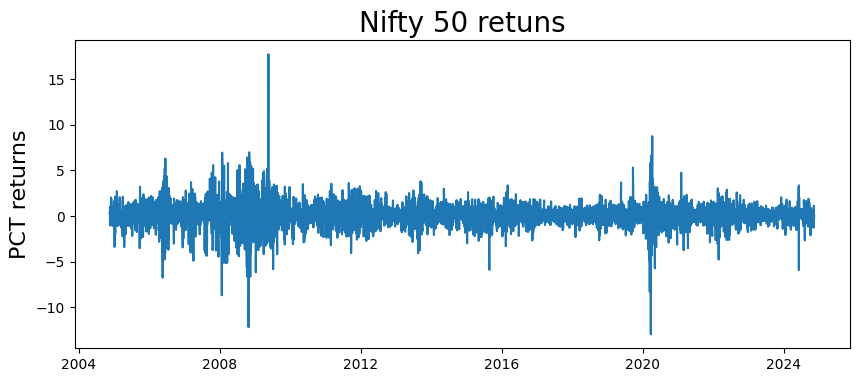

In [10]:
plt.figure(figsize = (10, 4))
plt.plot(returns)
plt.ylabel("PCT returns", fontsize = 16)
plt.title('Nifty 50 retuns', fontsize = 20)

In [11]:
# Check if the first date in df is missing in returns
missing_dates = df.index.difference(returns.index)

# Print the missing dates (if any)
print("Missing dates:", missing_dates)


Missing dates: DatetimeIndex(['2004-11-12'], dtype='datetime64[ns]', name='Date', freq=None)


In [12]:
df.drop(index='2004-11-12', inplace=True)

## PACF

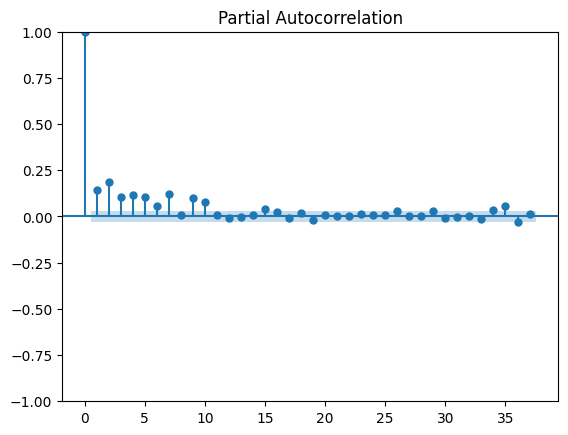

In [13]:
plot_pacf(returns**2)
plt.show()

## GRACH (5, 5)

In [14]:
model = arch_model(returns, p = 5, q = 5)
model_fit = model.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 36165.98306917402
Iteration:      2,   Func. Count:     31,   Neg. LLF: 1838372.8584462074
Iteration:      3,   Func. Count:     45,   Neg. LLF: 8154.91152390645
Iteration:      4,   Func. Count:     61,   Neg. LLF: 12628.977978092193
Iteration:      5,   Func. Count:     76,   Neg. LLF: 7686.172147693751
Iteration:      6,   Func. Count:     90,   Neg. LLF: 7792.904194476075
Iteration:      7,   Func. Count:    104,   Neg. LLF: 7791.897418150614
Iteration:      8,   Func. Count:    118,   Neg. LLF: 8602.428329514616
Iteration:      9,   Func. Count:    133,   Neg. LLF: 8121.28621835806
Iteration:     10,   Func. Count:    147,   Neg. LLF: 7518.107916331501
Iteration:     11,   Func. Count:    162,   Neg. LLF: 7569.275931581399
Iteration:     12,   Func. Count:    176,   Neg. LLF: 7429.134093057281
Iteration:     13,   Func. Count:    190,   Neg. LLF: 7408.98801342111
Iteration:     14,   Func. Count:    204,   Neg. LLF: 7401.262954

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7400.44
Distribution:                  Normal   AIC:                           14824.9
Method:            Maximum Likelihood   BIC:                           14903.0
                                        No. Observations:                 4960
Date:                Thu, Nov 14 2024   Df Residuals:                     4959
Time:                        22:56:05   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0849  1.405e-02      6.041  1.529e-09 [5.733e-02,  0.112]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0437  4.188e-02      1.044      0.297 [-3.837e-02,  0.126]
alpha[1]       0.0975  2.235e-02      4.362  1.287e-05  [5.370e-02,  0.141]
alpha[2]       0.1025  5.579e-02      1.838  6.609e-02 [-6.817e-03,  0.212]
alpha[3]   2.6248e-08  7.879e-02  3.331e-07      1.000    [ -0.154,  0.154]
alpha[4]       0.0226      0.114      0.199      0.842    [ -0.200,  0.245]
alpha[5]   7.2161e-09  5.721e-02  1.261e-07      1.000    [ -0.112,  0.112]
beta[1]    9.1648e-09      0.604  1.518e-08      1.000    [ -1.183,  1.183]
beta[2]        0.6643      0.704      0.943      0.346    [ -0.716,  2.044]
beta[3]    5.5846e-09      0.793  7.038e-09      1.000    [ -1.555,  1.555]
beta[4]    1.0738e-07      0.493  2.178e-07      1.000    [ -0.967,  0.967]
beta[5]        0.0924      0.479      0.193      0.847    [ -0.846,  1.031]
===========================================================================

Covariance estimator: robust
"""

## GRACH(2, 2)

In [16]:
model = arch_model(returns, p = 2, q = 2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 42138.48693736936
Iteration:      2,   Func. Count:     20,   Neg. LLF: 29136.647762187098
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1525783411.8107736
Iteration:      4,   Func. Count:     39,   Neg. LLF: 7590.611946064684
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2357363192.914316
Iteration:      6,   Func. Count:     55,   Neg. LLF: 7416.057770642061
Iteration:      7,   Func. Count:     63,   Neg. LLF: 7542.1433475518
Iteration:      8,   Func. Count:     72,   Neg. LLF: 7402.327533823126
Iteration:      9,   Func. Count:     79,   Neg. LLF: 7414.7878218009855
Iteration:     10,   Func. Count:     88,   Neg. LLF: 7596.119282253162
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7402.361572863783
Iteration:     12,   Func. Count:    105,   Neg. LLF: 7402.048003175828
Iteration:     13,   Func. Count:    112,   Neg. LLF: 7402.046325392029
Iteration:     14,   Func. Count:    119,   Neg. LLF: 7402.0462

In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7402.05
Distribution:                  Normal   AIC:                           14816.1
Method:            Maximum Likelihood   BIC:                           14855.1
                                        No. Observations:                 4960
Date:                Thu, Nov 14 2024   Df Residuals:                     4959
Time:                        22:56:05   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0849  1.417e-02      5.992  2.071e-09 [5.714e-02,  0.113]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0390  1.109e-02      3.520  4.322e-04  [1.729e-02,6.075e-02]
alpha[1]       0.0861  1.645e-02      5.232  1.673e-07    [5.384e-02,  0.118]
alpha[2]       0.1094  1.886e-02      5.799  6.691e-09    [7.241e-02,  0.146]
beta[1]    3.7020e-03  3.995e-02  9.267e-02      0.926 [-7.459e-02,8.199e-02]
beta[2]        0.7825  3.954e-02     19.790  3.608e-87      [  0.705,  0.860]
=============================================================================

Covariance estimator: robust
"""

## Rolling Predictions

In [18]:
rolling_predictions = []

testsize = 4959

for i in range(testsize):
    train = returns[:-(testsize - i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp="off")
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

print("Rolling predictions:", rolling_predictions)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\volatility.py:1215: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\di

Rolling predictions: [0.0, 0.09527560670520295, 0.15846935852722532, 0.7358567997600578, 1.0924899053869364, 0.001368778625947536, 0.9239898340308051, 0.5477457091375237, 0.9533460404024661, 0.9019135287604685, 0.837951373629275, 0.9359713470213888, 0.9160681176915919, 0.8918985758286441, 0.832912203681387, 0.896565574528484, 0.8287837059854641, 0.9295629669634041, 0.8858011754306682, 0.8705693717436023, 0.8538274838746802, 0.8186968672611784, 0.9007882776480871, 0.8509485145288315, 0.83174264967136, 0.8294343894167273, 0.8083451065132118, 0.7972937544095505, 0.7838748081821949, 0.7686921101448683, 0.7569054323910301, 0.7469729577734158, 0.7558954072894231, 0.7823800419400531, 0.7860376390751175, 0.9350222368765343, 3.571979277787365, 1.9977874519800662, 1.0123784470034358, 1.828316054357519, 1.792146808981546, 2.1561315109116017, 2.027838938945327, 1.4904854580912221, 0.795106535352805, 0.6487981980826671, 0.7372370342905055, 0.6735061038006663, 1.0829694997346497, 1.1350289586041769,

In [19]:
rolling_predictions = pd.Series(rolling_predictions, index = returns.index[-testsize:])

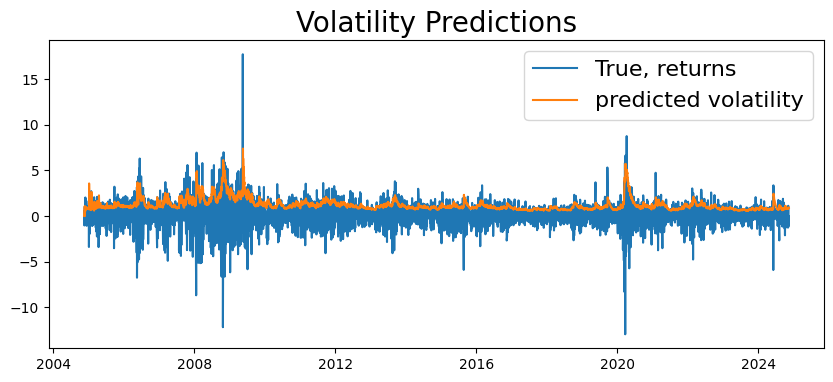

In [20]:
plt.figure(figsize = (10, 4))
true,  = plt.plot(returns[-testsize:])
preds, = plt.plot(rolling_predictions)
plt.title("Volatility Predictions", fontsize = 20)
plt.legend(["True, returns", "predicted volatility"], fontsize = 16)


In [21]:
train = returns
model = arch_model(train, p = 1, q = 0)
model_fit = model.fit(disp = "off")

In [22]:
pred = model_fit.forecast(horizon = 7)
future_dates = [df.index[-1] + timedelta(days = i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index = future_dates)

Text(0.5, 1.0, 'Volatility prediction - next 7 days')

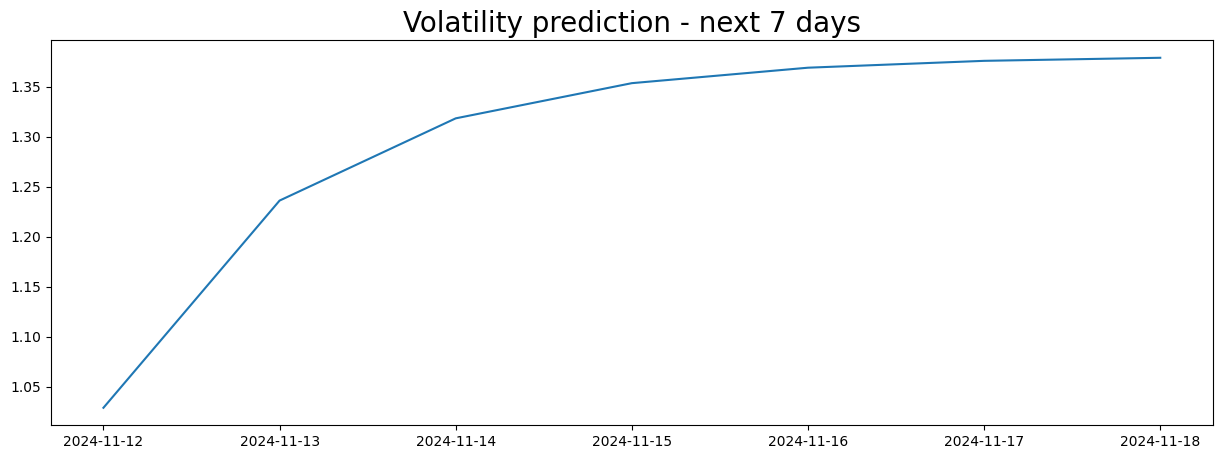

In [23]:
plt.figure(figsize = (15, 5))
plt.plot(pred)
plt.title("Volatility prediction - next 7 days", fontsize = 20)

## Prediction with Rolling WIndow

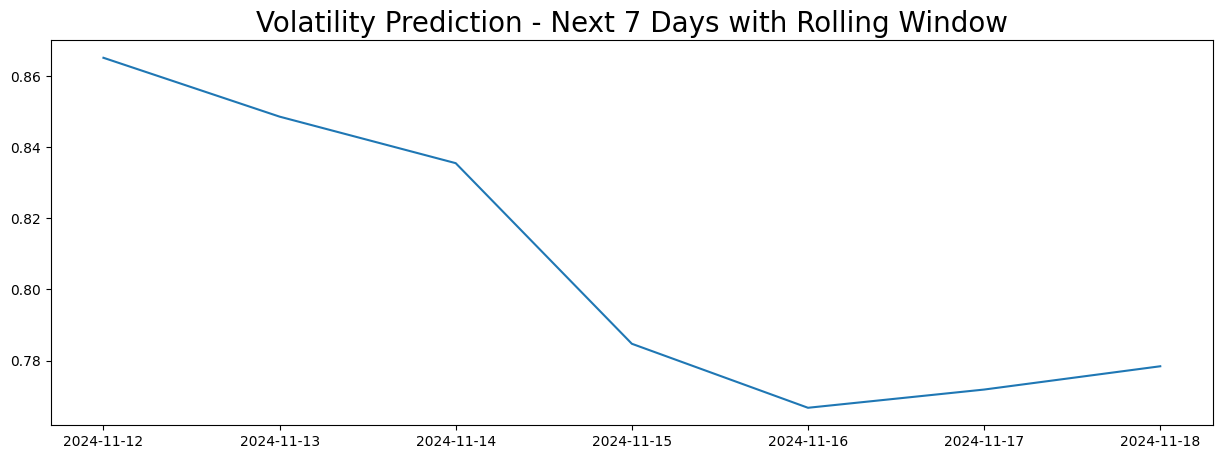

In [24]:
# Rolling forecast for the next 7 days
rolling_7day_forecast = []
train_data = returns  # Full dataset for training

for day in range(7):
    # Fit the model on current data
    model = arch_model(train_data, p=2, q=2)  # Experiment with (1,1) if flatness persists
    model_fit = model.fit(disp="off")

    # Forecast the next day's volatility
    forecast = model_fit.forecast(horizon=1)
    next_day_volatility = np.sqrt(forecast.variance.values[-1, :][0])
    rolling_7day_forecast.append(next_day_volatility)

    # Append a synthetic return for this day to update the training set
    # This simulates that we're moving one day forward each iteration
    synthetic_return = np.random.normal(0, next_day_volatility)  # Generate based on predicted volatility
    new_data = pd.Series([synthetic_return], index=[df.index[-1] + timedelta(days=1)])
    train_data = pd.concat([train_data, new_data])

# Create a series for plotting
future_dates = [df.index[-1] + timedelta(days=i + 1) for i in range(7)]
rolling_7day_forecast = pd.Series(rolling_7day_forecast, index=future_dates)

# Plot the 7-day volatility prediction with fluctuations
plt.figure(figsize=(15, 5))
plt.plot(rolling_7day_forecast)
plt.title("Volatility Prediction - Next 7 Days with Rolling Window", fontsize=20)
plt.show()


In [25]:
df1 = pd.read_csv("NIFTY MIDCAP 150.csv")

In [26]:
df1.head

<bound method NDFrame.head of             Index Name         Date      Open      High       Low     Close
0     NIFTY MIDCAP 150  19 Sep 2024  22190.75  22245.85   21621.6  21965.15
1     NIFTY MIDCAP 150  18 Sep 2024   22261.3  22283.45  21971.55  22079.90
2     NIFTY MIDCAP 150  17 Sep 2024   22311.5   22320.6   22174.2  22235.35
3     NIFTY MIDCAP 150  16 Sep 2024  22306.05  22314.85  22188.15  22264.70
4     NIFTY MIDCAP 150  13 Sep 2024     22127  22243.55   22093.5  22190.35
...                ...          ...       ...       ...       ...       ...
3647  NIFTY MIDCAP 150  08 Jan 2010         -         -         -   2386.13
3648  NIFTY MIDCAP 150  07 Jan 2010         -         -         -   2388.37
3649  NIFTY MIDCAP 150  06 Jan 2010         -         -         -   2383.42
3650  NIFTY MIDCAP 150  05 Jan 2010         -         -         -   2368.30
3651  NIFTY MIDCAP 150  04 Jan 2010         -         -         -   2336.43

[3652 rows x 6 columns]>

In [29]:
df1.columns

Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [30]:
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'])
df1

,Index Name,Date,Open,High,Low,Close
0,NIFTY MIDCAP 150,2024-09-19,22190.75,22245.85,21621.6,21965.15
1,NIFTY MIDCAP 150,2024-09-18,22261.3,22283.45,21971.55,22079.90
2,NIFTY MIDCAP 150,2024-09-17,22311.5,22320.6,22174.2,22235.35
3,NIFTY MIDCAP 150,2024-09-16,22306.05,22314.85,22188.15,22264.70
4,NIFTY MIDCAP 150,2024-09-13,22127,22243.55,22093.5,22190.35
...,...,...,...,...,...,...
3647,NIFTY MIDCAP 150,2010-01-08,-,-,-,2386.13
3648,NIFTY MIDCAP 150,2010-01-07,-,-,-,2388.37
3649,NIFTY MIDCAP 150,2010-01-06,-,-,-,2383.42
3650,NIFTY MIDCAP 150,2010-01-05,-,-,-,2368.30


In [31]:
df1 = df1.sort_values('Date')

In [32]:
df1.set_index('Date', inplace=True)

In [33]:
returns = 100 * df1['Close'].pct_change().dropna()
print(returns.head())

Date
2010-01-05    1.364047
2010-01-06    0.638433
2010-01-07    0.207685
2010-01-08   -0.093788
2010-01-11    1.049817
Name: Close, dtype: float64


In [34]:
returns.index[-1]

Timestamp('2024-09-19 00:00:00')

Text(0.5, 1.0, 'Nifty 50 retuns')

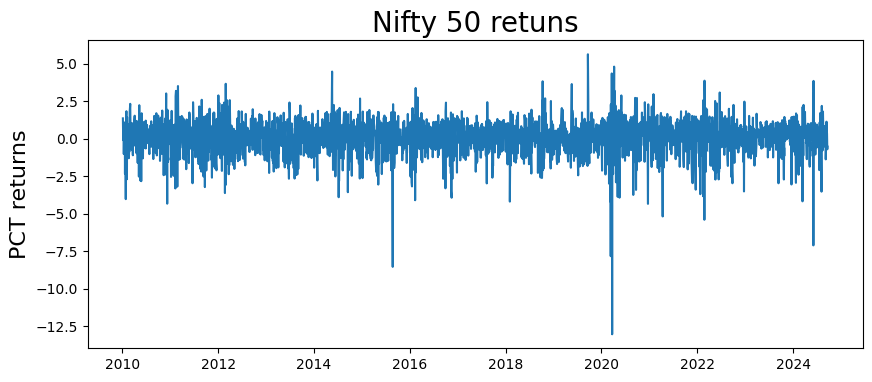

In [35]:
plt.figure(figsize = (10, 4))
plt.plot(returns)
plt.ylabel("PCT returns", fontsize = 16)
plt.title('Nifty 50 retuns', fontsize = 20)

In [38]:
# Check if the first date in df is missing in returns
missing_dates = df1.index.difference(returns.index)

# Print the missing dates (if any)
print("Missing dates:", missing_dates)


Missing dates: DatetimeIndex(['2010-01-04'], dtype='datetime64[ns]', name='Date', freq=None)


In [39]:
df1.drop(index='2010-01-04', inplace=True)

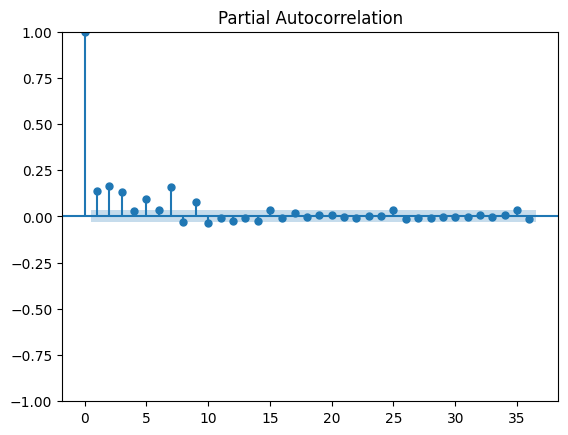

In [40]:
plot_pacf(returns**2)
plt.show()

In [41]:
model = arch_model(returns, p = 3, q = 3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 26532.062175739688
Iteration:      2,   Func. Count:     23,   Neg. LLF: 5470.963254722181
Iteration:      3,   Func. Count:     35,   Neg. LLF: 1276985.9880184922
Iteration:      4,   Func. Count:     45,   Neg. LLF: 5370.87128223035
Iteration:      5,   Func. Count:     56,   Neg. LLF: 5570.256123841217
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5255.117290345618
Iteration:      7,   Func. Count:     76,   Neg. LLF: 5475.85944121437
Iteration:      8,   Func. Count:     86,   Neg. LLF: 5228.073967418032
Iteration:      9,   Func. Count:     96,   Neg. LLF: 5238.190409117549
Iteration:     10,   Func. Count:    106,   Neg. LLF: 5202.360256066866
Iteration:     11,   Func. Count:    115,   Neg. LLF: 5201.982863145333
Iteration:     12,   Func. Count:    124,   Neg. LLF: 5201.797467162069
Iteration:     13,   Func. Count:    133,   Neg. LLF: 5201.748551796974
Iteration:     14,   Func. Count:    142,   Neg. LLF: 5201.72264

In [42]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5201.72
Distribution:                  Normal   AIC:                           10419.4
Method:            Maximum Likelihood   BIC:                           10469.1
                                        No. Observations:                 3651
Date:                Thu, Nov 14 2024   Df Residuals:                     3650
Time:                        23:14:42   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1076  1.849e-02      5.820  5.874e-09 [7.138e-02,  0.144]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1306      0.439      0.298      0.766   [ -0.729,  0.991]
alpha[1]       0.1948  7.337e-02      2.655  7.925e-03 [5.101e-02,  0.339]
alpha[2]       0.0148      0.198  7.495e-02      0.940   [ -0.373,  0.403]
alpha[3]   2.0811e-12      0.569  3.657e-12      1.000   [ -1.115,  1.115]
beta[1]        0.5361      0.743      0.722      0.470   [ -0.920,  1.992]
beta[2]    1.7645e-11      2.519  7.004e-12      1.000   [ -4.938,  4.938]
beta[3]        0.1500      1.914  7.837e-02      0.938   [ -3.602,  3.902]
==========================================================================

Covariance estimator: robust
"""

In [44]:
model = arch_model(returns, p = 2, q = 2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 23625.53100313626
Iteration:      2,   Func. Count:     19,   Neg. LLF: 12135.295253617758
Iteration:      3,   Func. Count:     30,   Neg. LLF: 6123.901320753208
Iteration:      4,   Func. Count:     38,   Neg. LLF: 5371.593827131837
Iteration:      5,   Func. Count:     47,   Neg. LLF: 5944.344491813588
Iteration:      6,   Func. Count:     55,   Neg. LLF: 5305.172128442788
Iteration:      7,   Func. Count:     64,   Neg. LLF: 5204.105160413578
Iteration:      8,   Func. Count:     71,   Neg. LLF: 5203.790831619041
Iteration:      9,   Func. Count:     78,   Neg. LLF: 5203.509743756773
Iteration:     10,   Func. Count:     85,   Neg. LLF: 5203.50082462629
Iteration:     11,   Func. Count:     92,   Neg. LLF: 5203.499711524388
Iteration:     12,   Func. Count:     99,   Neg. LLF: 5203.499584970385
Iteration:     13,   Func. Count:    106,   Neg. LLF: 5203.499581537899
Iteration:     14,   Func. Count:    112,   Neg. LLF: 5203.49958

In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5203.50
Distribution:                  Normal   AIC:                           10419.0
Method:            Maximum Likelihood   BIC:                           10456.2
                                        No. Observations:                 3651
Date:                Thu, Nov 14 2024   Df Residuals:                     3650
Time:                        23:15:09   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1072  1.839e-02      5.833  5.451e-09 [7.121e-02,  0.143]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1197  7.184e-02      1.666  9.580e-02 [-2.115e-02,  0.260]
alpha[1]       0.1856  3.829e-02      4.847  1.255e-06    [  0.111,  0.261]
alpha[2]   2.7190e-14      0.109  2.503e-13      1.000    [ -0.213,  0.213]
beta[1]        0.5972      0.610      0.978      0.328    [ -0.599,  1.793]
beta[2]        0.1216      0.457      0.266      0.790    [ -0.773,  1.016]
===========================================================================

Covariance estimator: robust
"""

In [46]:
model = arch_model(returns, p = 1, q = 2)
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 30661.403088646977
Iteration:      2,   Func. Count:     18,   Neg. LLF: 21048.444772332805
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1424898712.645284
Iteration:      4,   Func. Count:     35,   Neg. LLF: 5241.100366263105
Iteration:      5,   Func. Count:     42,   Neg. LLF: 5298.332264051545
Iteration:      6,   Func. Count:     50,   Neg. LLF: 5205.276193514773
Iteration:      7,   Func. Count:     57,   Neg. LLF: 5209.9736356384665
Iteration:      8,   Func. Count:     65,   Neg. LLF: 5203.504658538619
Iteration:      9,   Func. Count:     71,   Neg. LLF: 5203.49966269308
Iteration:     10,   Func. Count:     77,   Neg. LLF: 5203.499583440243
Iteration:     11,   Func. Count:     83,   Neg. LLF: 5203.49958152232
Iteration:     12,   Func. Count:     88,   Neg. LLF: 5203.499581522203
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5203.49958152232
            Iterations: 12
 

In [47]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5203.50
Distribution:                  Normal   AIC:                           10417.0
Method:            Maximum Likelihood   BIC:                           10448.0
                                        No. Observations:                 3651
Date:                Thu, Nov 14 2024   Df Residuals:                     3650
Time:                        23:15:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1072  1.834e-02      5.847  4.997e-09 [7.130e-02,  0.143]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1197  3.214e-02      3.723  1.971e-04 [5.666e-02,  0.183]
alpha[1]       0.1856  3.755e-02      4.942  7.749e-07   [  0.112,  0.259]
beta[1]        0.5972      0.148      4.024  5.721e-05   [  0.306,  0.888]
beta[2]        0.1216      0.130      0.932      0.351   [ -0.134,  0.377]
==========================================================================

Covariance estimator: robust
"""

In [48]:
len(returns)

3651

In [49]:
rolling_predictions = []

testsize = 3650

for i in range(testsize):
    train = returns[:-(testsize - i)]
    model = arch_model(train, p=1, q=2)
    model_fit = model.fit(disp="off")
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

print("Rolling predictions:", rolling_predictions)

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\volatility.py:1215: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\di

Rolling predictions: [0.0, 0.3628071134059274, 0.4290651353293392, 0.45305741203523914, 0.5148941454882234, 0.8813108114479044, 0.7809010860954264, 0.7735224311163755, 0.6939014528726529, 0.6506769762622252, 0.6819566923726027, 0.6658686909848651, 1.143053667539156, 1.1313590474705875, 1.1449060875006463, 1.6513679568627937, 1.5957461509451918, 1.5982978854258922, 1.6589118671635181, 1.6236258934439718, 1.636572489403261, 1.6707322958128905, 1.7498331900590813, 1.7648061899242622, 1.7137844244660734, 1.6808984554680302, 1.6283907087854406, 0.8581286219425341, 1.2232258250858243, 0.8662931626474832, 0.9826642003929558, 1.1357471383753612, 1.7752045359364956, 1.0682256403357024, 1.1571461008210056, 1.005698282814206, 1.0145389108668126, 1.4525574701386537, 1.8589901327210354, 1.4436803373067464, 1.2719771055915037, 0.8238434408301091, 0.7466959235815687, 1.2190321728023368, 0.9214154911967259, 0.889657049753048, 0.866851097636708, 1.0323700480725335, 1.05783288161952, 0.8617425156895809,

In [50]:
rolling_predictions = pd.Series(rolling_predictions, index = returns.index[-testsize:])

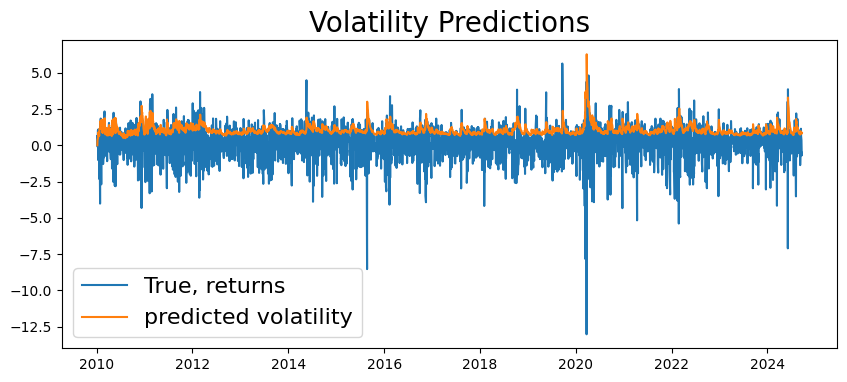

In [51]:
plt.figure(figsize = (10, 4))
true,  = plt.plot(returns[-testsize:])
preds, = plt.plot(rolling_predictions)
plt.title("Volatility Predictions", fontsize = 20)
plt.legend(["True, returns", "predicted volatility"], fontsize = 16)


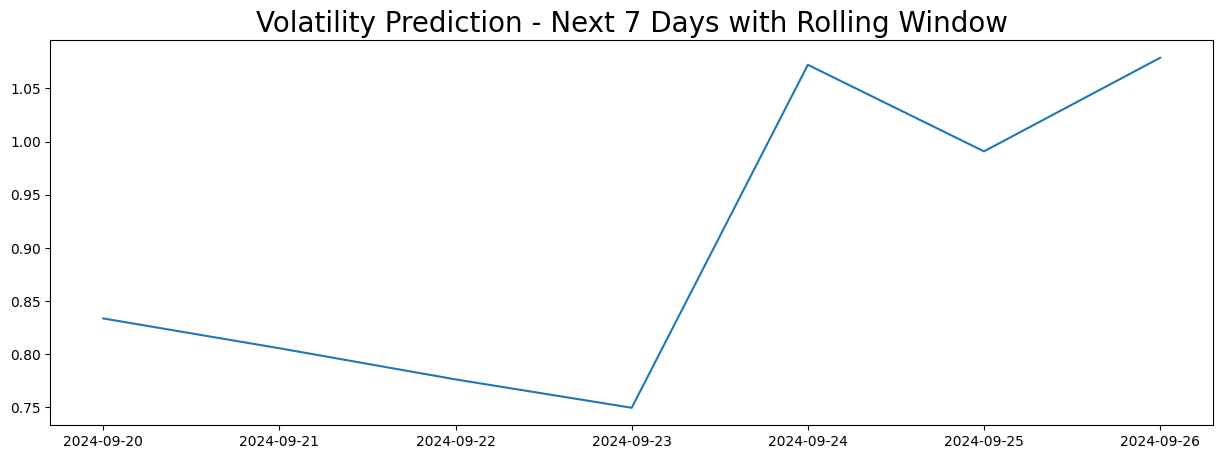

In [52]:
# Rolling forecast for the next 7 days
rolling_7day_forecast = []
train_data = returns  # Full dataset for training

for day in range(7):
    # Fit the model on current data
    model = arch_model(train_data, p=1, q=2)  # Experiment with (1,1) if flatness persists
    model_fit = model.fit(disp="off")

    # Forecast the next day's volatility
    forecast = model_fit.forecast(horizon=1)
    next_day_volatility = np.sqrt(forecast.variance.values[-1, :][0])
    rolling_7day_forecast.append(next_day_volatility)

    # Append a synthetic return for this day to update the training set
    # This simulates that we're moving one day forward each iteration
    synthetic_return = np.random.normal(0, next_day_volatility)  # Generate based on predicted volatility
    new_data = pd.Series([synthetic_return], index=[df1.index[-1] + timedelta(days=1)])
    train_data = pd.concat([train_data, new_data])

# Create a series for plotting
future_dates = [df1.index[-1] + timedelta(days=i + 1) for i in range(7)]
rolling_7day_forecast = pd.Series(rolling_7day_forecast, index=future_dates)

# Plot the 7-day volatility prediction with fluctuations
plt.figure(figsize=(15, 5))
plt.plot(rolling_7day_forecast)
plt.title("Volatility Prediction - Next 7 Days with Rolling Window", fontsize=20)
plt.show()


In [54]:
df2 = pd.read_csv("NIFTY SMALLCAP 250.csv")

In [55]:
df2.head

<bound method NDFrame.head of               Index Name         Date      Open      High       Low     Close
0     NIFTY SMALLCAP 250  19 Sep 2024   18583.7  18619.45  18057.95  18270.40
1     NIFTY SMALLCAP 250  18 Sep 2024  18568.55  18610.95  18393.95  18475.80
2     NIFTY SMALLCAP 250  17 Sep 2024   18618.7  18622.85  18466.95  18538.30
3     NIFTY SMALLCAP 250  16 Sep 2024   18636.8   18656.7  18503.35  18572.90
4     NIFTY SMALLCAP 250  13 Sep 2024   18470.4   18563.6  18430.05  18543.15
...                  ...          ...       ...       ...       ...       ...
3647  NIFTY SMALLCAP 250  08 Jan 2010         -         -         -   2700.49
3648  NIFTY SMALLCAP 250  07 Jan 2010         -         -         -   2691.84
3649  NIFTY SMALLCAP 250  06 Jan 2010         -         -         -   2677.49
3650  NIFTY SMALLCAP 250  05 Jan 2010         -         -         -   2660.06
3651  NIFTY SMALLCAP 250  04 Jan 2010         -         -         -   2637.08

[3652 rows x 6 columns]>

In [56]:
df2.columns

Index(['Index Name', 'Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [57]:
df2.columns = df2.columns.str.strip()
df2['Date'] = pd.to_datetime(df2['Date'])
df2

,Index Name,Date,Open,High,Low,Close
0,NIFTY SMALLCAP 250,2024-09-19,18583.7,18619.45,18057.95,18270.40
1,NIFTY SMALLCAP 250,2024-09-18,18568.55,18610.95,18393.95,18475.80
2,NIFTY SMALLCAP 250,2024-09-17,18618.7,18622.85,18466.95,18538.30
3,NIFTY SMALLCAP 250,2024-09-16,18636.8,18656.7,18503.35,18572.90
4,NIFTY SMALLCAP 250,2024-09-13,18470.4,18563.6,18430.05,18543.15
...,...,...,...,...,...,...
3647,NIFTY SMALLCAP 250,2010-01-08,-,-,-,2700.49
3648,NIFTY SMALLCAP 250,2010-01-07,-,-,-,2691.84
3649,NIFTY SMALLCAP 250,2010-01-06,-,-,-,2677.49
3650,NIFTY SMALLCAP 250,2010-01-05,-,-,-,2660.06


In [60]:
df2 = df2.sort_values('Date')

In [61]:
df2.set_index('Date', inplace=True)

In [62]:
returns = 100 * df2['Close'].pct_change().dropna()
print(returns.head())

Date
2010-01-05    0.871418
2010-01-06    0.655248
2010-01-07    0.535950
2010-01-08    0.321342
2010-01-11    1.498247
Name: Close, dtype: float64


In [63]:
returns.index[-1]

Timestamp('2024-09-19 00:00:00')

Text(0.5, 1.0, 'Nifty Small Cap 250 retuns')

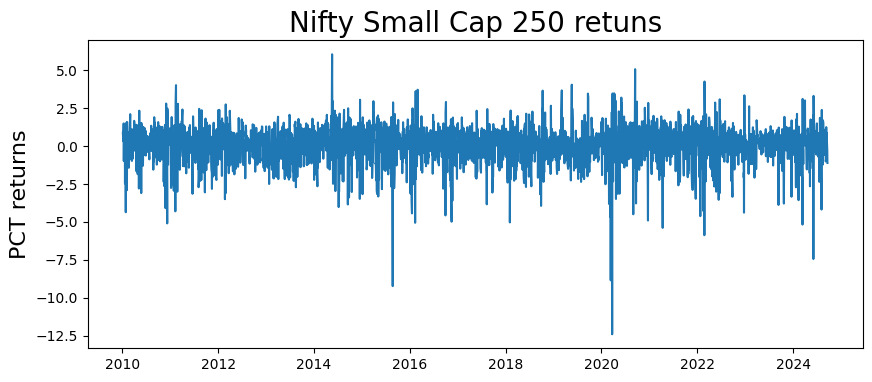

In [65]:
plt.figure(figsize = (10, 4))
plt.plot(returns)
plt.ylabel("PCT returns", fontsize = 16)
plt.title('Nifty Small Cap 250 retuns', fontsize = 20)

In [66]:
# Check if the first date in df is missing in returns
missing_dates = df2.index.difference(returns.index)

# Print the missing dates (if any)
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex(['2010-01-04'], dtype='datetime64[ns]', name='Date', freq=None)


In [67]:
df.drop(index='2010-01-04', inplace=True)

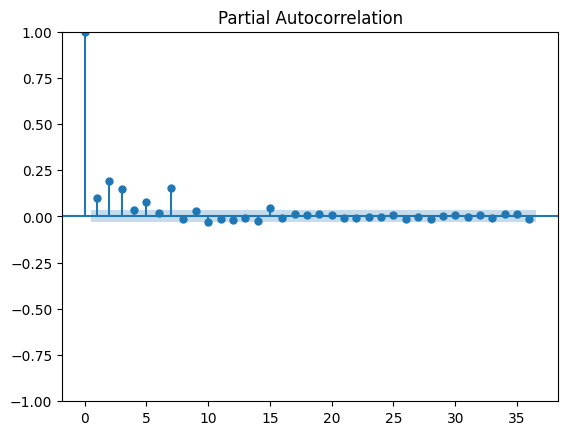

In [68]:
plot_pacf(returns**2)
plt.show()

In [69]:
model = arch_model(returns, p = 3, q = 3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 22578.268828060045
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2215663.5609074617
Iteration:      3,   Func. Count:     33,   Neg. LLF: 5961.3681477582595
Iteration:      4,   Func. Count:     44,   Neg. LLF: 5974.970238483227
Iteration:      5,   Func. Count:     54,   Neg. LLF: 5996.622129556277
Iteration:      6,   Func. Count:     64,   Neg. LLF: 6407.200512262166
Iteration:      7,   Func. Count:     75,   Neg. LLF: 5545.66625563895
Iteration:      8,   Func. Count:     86,   Neg. LLF: 5508.3783963306905
Iteration:      9,   Func. Count:     96,   Neg. LLF: 5484.638541794561
Iteration:     10,   Func. Count:    106,   Neg. LLF: 5482.626255565012
Iteration:     11,   Func. Count:    115,   Neg. LLF: 5482.655914066583
Iteration:     12,   Func. Count:    125,   Neg. LLF: 5482.535198106718
Iteration:     13,   Func. Count:    134,   Neg. LLF: 5482.526433048247
Iteration:     14,   Func. Count:    143,   Neg. LLF: 5482.52

In [70]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5482.53
Distribution:                  Normal   AIC:                           10981.1
Method:            Maximum Likelihood   BIC:                           11030.7
                                        No. Observations:                 3651
Date:                Thu, Nov 14 2024   Df Residuals:                     3650
Time:                        23:23:52   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1097  1.959e-02      5.600  2.142e-08 [7.130e-02,  0.148]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.2187      0.172      1.271      0.204 [ -0.119,  0.556]
alpha[1]       0.2264  4.384e-02      5.164  2.422e-07 [  0.140,  0.312]
alpha[2]       0.0491      0.126      0.389      0.697 [ -0.198,  0.297]
alpha[3]       0.0000      0.126      0.000      1.000 [ -0.246,  0.246]
beta[1]        0.4854      0.506      0.959      0.337 [ -0.506,  1.477]
beta[2]    1.0373e-14      0.449  2.311e-14      1.000 [ -0.880,  0.880]
beta[3]        0.0968      0.275      0.352      0.725 [ -0.443,  0.637]
========================================================================

Covariance estimator: robust
"""

In [75]:
model = arch_model(returns, p = 1, q = 1)
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29604.913705339197
Iteration:      2,   Func. Count:     15,   Neg. LLF: 21333.723651438853
Iteration:      3,   Func. Count:     23,   Neg. LLF: 6072.197043611709
Iteration:      4,   Func. Count:     30,   Neg. LLF: 5752.949130503626
Iteration:      5,   Func. Count:     37,   Neg. LLF: 5846.875253974704
Iteration:      6,   Func. Count:     43,   Neg. LLF: 5484.476699488674
Iteration:      7,   Func. Count:     49,   Neg. LLF: 5483.142114483446
Iteration:      8,   Func. Count:     54,   Neg. LLF: 5483.138100979413
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5483.138087279196
Iteration:     10,   Func. Count:     63,   Neg. LLF: 5483.138087280649
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5483.138087279196
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


In [76]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5483.14
Distribution:                  Normal   AIC:                           10974.3
Method:            Maximum Likelihood   BIC:                           10999.1
                                        No. Observations:                 3651
Date:                Thu, Nov 14 2024   Df Residuals:                     3650
Time:                        23:24:37   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1102  1.968e-02      5.601  2.133e-08 [7.167e-02,  0.149]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1797  3.621e-02      4.963  6.928e-07 [  0.109,  0.251]
alpha[1]       0.2249  3.823e-02      5.884  4.016e-09 [  0.150,  0.300]
beta[1]        0.6587  4.812e-02     13.691  1.155e-42 [  0.564,  0.753]
========================================================================

Covariance estimator: robust
"""

In [77]:
len(returns)

3651

In [81]:
rolling_predictions = []

testsize = 3650

for i in range(testsize):
    train = returns[:-(testsize - i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp="off")
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\volatility.py:1215: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\distribution.py:449: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\univariate\di

In [82]:
print("Rolling predictions:", rolling_predictions)

Rolling predictions: [0.0, 0.10808500457383241, 0.12223164631873942, 0.19116327649260245, 0.7679211242628007, 1.6801927015327067, 0.2600429581373, 0.5604055141056481, 0.28987839676316995, 0.2000723815663217, 0.7222962017639372, 0.6686889522878225, 1.2098863108114382, 1.2164316901401027, 1.2060584804340426, 1.7819812846230958, 1.7175128197019642, 1.7048411441046678, 1.724643291834897, 1.6797988104769996, 1.6791297195312382, 1.670092938133777, 1.7746847575242726, 1.7975404238021724, 1.7422698052001349, 1.7037059055422012, 1.6412684365351762, 1.585550029739055, 1.5150020125198778, 1.4661447393446696, 1.4377908797588883, 1.401428384000169, 1.395417428528194, 1.369746546288077, 1.3486844366585788, 1.3240875837656805, 1.3011499463851268, 1.3005627167479341, 1.343233245870956, 1.3409240192831455, 1.3264641441783662, 1.3115243639642697, 1.3018206634857472, 1.2912256339161807, 1.182233856656172, 1.1207085748665988, 1.0491582511196396, 1.1099745418250089, 1.1423766877672552, 1.069986999275912, 1

In [83]:
rolling_predictions = pd.Series(rolling_predictions, index = returns.index[-testsize:])

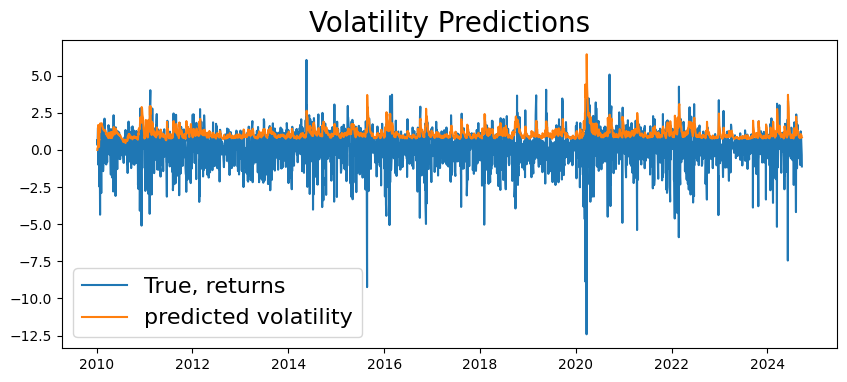

In [84]:
plt.figure(figsize = (10, 4))
true,  = plt.plot(returns[-testsize:])
preds, = plt.plot(rolling_predictions)
plt.title("Volatility Predictions", fontsize = 20)
plt.legend(["True, returns", "predicted volatility"], fontsize = 16)

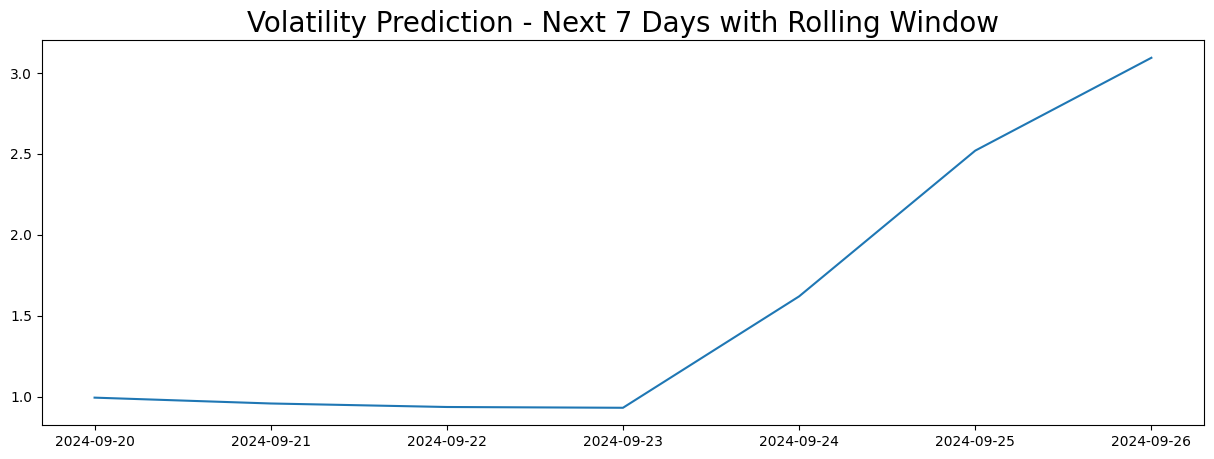

In [85]:
# Rolling forecast for the next 7 days
rolling_7day_forecast = []
train_data = returns  # Full dataset for training

for day in range(7):
    # Fit the model on current data
    model = arch_model(train_data, p=1, q=1)  # Experiment with (1,1) if flatness persists
    model_fit = model.fit(disp="off")

    # Forecast the next day's volatility
    forecast = model_fit.forecast(horizon=1)
    next_day_volatility = np.sqrt(forecast.variance.values[-1, :][0])
    rolling_7day_forecast.append(next_day_volatility)

    # Append a synthetic return for this day to update the training set
    # This simulates that we're moving one day forward each iteration
    synthetic_return = np.random.normal(0, next_day_volatility)  # Generate based on predicted volatility
    new_data = pd.Series([synthetic_return], index=[df2.index[-1] + timedelta(days=1)])
    train_data = pd.concat([train_data, new_data])

# Create a series for plotting
future_dates = [df2.index[-1] + timedelta(days=i + 1) for i in range(7)]
rolling_7day_forecast = pd.Series(rolling_7day_forecast, index=future_dates)

# Plot the 7-day volatility prediction with fluctuations
plt.figure(figsize=(15, 5))
plt.plot(rolling_7day_forecast)
plt.title("Volatility Prediction - Next 7 Days with Rolling Window", fontsize=20)
plt.show()
